## Introduction

Word-counting techniques and dictionary-based methods are the most simple forms of quantitative text analysis.

This tutorial will cover both of these topics, as well as sentiment analysis, which is a form of dictionary-based text analysis.

### Goal.

I want you to output a single diagram that tells us the following: *did Donald Trump's tweets become more or less negative across his term in office*? 

Perhaps uninspired and outdated at this point! - but the data is so rich and easily accessible, and perfect for this kind of analysis. I want you to think about where this techniques could be useful to you.

## The Data - Processed Tweets
We've already processed the tweet data - now lets run our sentiment analysis.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('processed_tweets.csv')
df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,textp
0,815422340540547073,"TO ALL AMERICANS-#HappyNewYear &amp, many bles...",f,f,Twitter for iPhone,108920,26891,2017-01-01 05:00:10,f,many blessing all look forward wonderful prosp...
1,815930688889352192,"Well, the New Year begins. We will, together, ...",f,f,Twitter for Android,105506,23739,2017-01-02 14:40:10,f,well new year begin will together make america...
2,815973752785793024,"Chicago murder rate is record setting - 4,331 ...",f,f,Twitter for Android,52993,13992,2017-01-02 17:31:17,f,chicago murder rate record set shoot victim mu...
3,815989154555297792,"""@CNN just released a book called """"Unpreceden...",f,f,Twitter for Android,11394,3165,2017-01-02 18:32:29,f,just release book call unprecedented explores ...
4,815990335318982656,Various media outlets and pundits say that I t...,f,f,Twitter for Android,39567,7264,2017-01-02 18:37:10,f,various medium outlet pundit say thought go lo...
...,...,...,...,...,...,...,...,...,...,...
5391,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",f,f,Twitter for iPhone,126997,27021,2018-12-31 15:37:14,f,oval office democrat come back vacation now gi...
5392,1079763923845419009,It’s incredible how Democrats can all use thei...,f,f,Twitter for iPhone,125636,26560,2018-12-31 15:39:15,f,it incredible democrat can use ridiculous soun...
5393,1079830267274108930,Heads of countries are calling wanting to know...,f,f,Twitter for iPhone,87357,21317,2018-12-31 20:02:52,f,head country call want know senator schumer ap...
5394,1079830268708556800,"....Senator Schumer, more than a year longer t...",f,f,Twitter for iPhone,75463,17875,2018-12-31 20:02:52,f,senator schumer year longer administration his...


## The Document-Term Matrix

A core concept in quantitative text analysis is a Document-Term Matrix. This is a matrix where each word is a row and each colum is a document. The number within each cell describes the number of times the word appears in the document. Many of the most popular forms of text analysis, such as topic models, require a document term matrix.

We'll use the CountVectorizer package from sklearn here - be liberal with your package use, don't reinvent the wheel.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Drop null values first
df.dropna(subset=['textp'], inplace=True)

# Fit the vectorizer to the data
X = vectorizer.fit_transform(df['textp'])

# Convert the X matrix to a dataframe
dtm = pd.DataFrame(X.todense())

# Save the length of the data for later on - this give us the number of docs
max_len = len(dtm)

# Set the column names to the words that the vectorizer found
dtm.columns = vectorizer.get_feature_names_out()

# Transpose the dataframe so that the words are the rows
term_document_matrix = dtm.T

# Name the columns such that each column is a numbered document
term_document_matrix.columns = ['Doc '+str(i) for i in range(max_len)]
term_document_matrix


,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,...,Doc 5282,Doc 5283,Doc 5284,Doc 5285,Doc 5286,Doc 5287,Doc 5288,Doc 5289,Doc 5290,Doc 5291
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbott,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Question 1
What's the top word used by Trump in this time period? What's the top 25 words? Also, draw a graph of these (just run .plot.bar() on a series, in a new Jupyter cell)

In [38]:
# Solution to Question 1
dtm = term_document_matrix
dtm['total_count'] = dtm.sum(axis=1)
top25 = dtm.sort_values(by ='total_count',ascending=False)[:25]
# of course great is the most common word!

<AxesSubplot:>

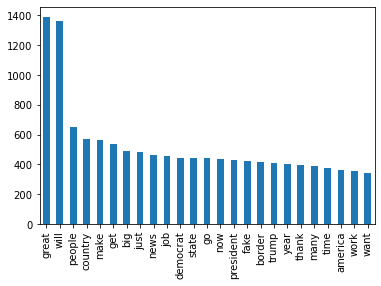

In [39]:
# Solution to Question 1
top25['total_count'].plot.bar()

## tf-idf

Though we have already removed very common “stop words” from our analysis, it is common practice in quantitative text analysis to identify unusual words that might set one document apart from the others. The metric most commonly used to identify these unusual words is “Term Frequency Inverse Document Frequency” (tf-idf) - I haven't shown this here, but is useful to know.

## Dictionary-Based Quantitative Text Analysis
Though word frequency counts and tf-idf can be an informative way to examine text-based data, another very popular techniques involves counting the number of words that appear in each document that have been assigned a particular meaning or value to the researcher. There are numerous examples that we shall discuss below— some of which are more sophisticated than others.

### Creating your own dictionary

To begin, let’s make our own dictionary of terms we want to examine from the Trump tweet dataset. Suppose we are doing a study of economic issues, and want to subset those tweets that contain words associated with the economy. To do this, we could first create a list or “dictionary” or terms that are associated with the economy.



In [52]:
economic_dictionary = ["economy","unemployment","trade","tariffs"]

## Question 2

Subset the dataframe of tweets, such that we only store tweets which contain the words of the dictionary above.


In [69]:
# Solution to Question 2
def filter_dict(tweet):
    found = False
    for word in economic_dictionary:
        if tweet.find(word) != -1:
            found = True
            break
    return found

df['economic'] = df['textp'].apply(filter_dict)
economic_tweets = df[df['economic']==True]
economic_tweets['textp']

7       china take massive amount money wealth totally...
170     billion dollar trade deficit mexico one side d...
176     mexico take advantage long enough massive trad...
397     tremendous respect woman many role serve vital...
482     meeting next week china will difficult one can...
                              ...                        
5342    we substantially subsidize military many rich ...
5345    problem economy fed don feel market don unders...
5353    hope everyone even fake news medium great chri...
5368    the united state loos soooo much money trade m...
5378    call the year worker steve moore co author tru...
Name: textp, Length: 324, dtype: object

## Sentiment Analysis

The example above was somewhat arbitrary and mostly designed to introduce you to the concept of dictionary-base text analysis. The list of economic terms that I came up with was very ad hoc—and though the tweets identified above each mention the economy, there are probably many more tweets in our dataset that reference economic issues that do not include the words I identified.

Dictionary-based approaches are often most useful when a high-quality dictionary is available that is of interest to the researcher or analyst. One popular type of dictionary is a sentiment dictionary which can be used to assess the valence of a given text by searching for words that describe affect or opinion. Some of these dictionaries are created by examining comparing text-based evaluations of products in online forums to ratings systems. Others are created via systematic observation of people writing who have been primed to write about different emotions.

Pre-made dictionaries exist.
These include the
- `afinn` which includes a list of sentiment-laden words that appeared in Twitter discussions of climate change
- `bing` which includes sentiemnt words identified on online forums;
- and `nrc` which is a dictionary that was created by having workers on Amazon mechanical Turk code the emotional valence of a long list of terms.
  
These algorithims often produce similar results, even though they are trained on different datasets (meaning they identify sentiment laden words using different corpora). Each of these dictionaries only describe sentiment-laden words in the English language. They also have different scales.

We are going to used a good pre-trained dictionary called VADER, part of the NLTK package in Python.

In [95]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("wow")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tom/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5574}

## Question 3
This returns a dictionary with the sentiment scores of the phrase for different models (neg, neu, pos or compound.)

The VADER algorithm outputs sentiment scores to 4 classes of sentiments https://github.com/nltk/nltk/blob/develop/nltk/sentiment/vader.py#L441:
- neg: Negative
- neu: Neutral
- pos: Positive
- compound: Compound (i.e. aggregated score)


 This gives you enough now to perform the main task: understand how sentiment has changed over time for Trumps tweets - in whatever way you wish. Make sure you find the sentiment for each word only, even though NLTK will allow you to do more.
 - It may be useful just to understand the number of negative words in a Tweet, as something to track over time simply.

<AxesSubplot:xlabel='date', ylabel='sentiment'>

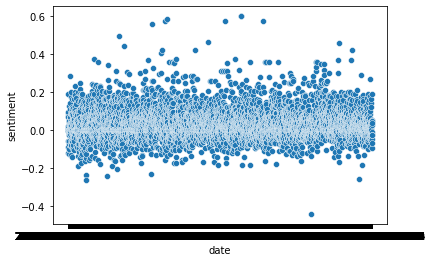

In [97]:
## Sample solution to Question 3 - too vauge!

def sentiment_combined(tweet):
    sum = 0
    for word in tweet.split():
        sum += sia.polarity_scores(word)['compound']

    return sum/len(tweet.split())

df['sentiment'] = df['textp'].apply(sentiment_combined)
import seaborn as sns
sns.scatterplot(x='date',y='sentiment',data=df)

<AxesSubplot:xlabel='date', ylabel='sentiment'>

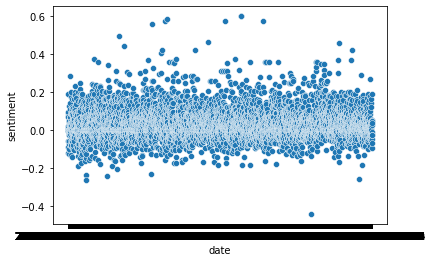

In [98]:
## Sample solution to Question 3 - too vauge!

def negative_count(tweet):
    sum_neg = 0
    for word in tweet.split():
        score = sia.polarity_scores(word)['neg']
        sum_neg = sum_neg + score 

    return sum/len(tweet.split())

df['sentiment'] = df['textp'].apply(sentiment_combined)
import seaborn as sns
sns.scatterplot(x='date',y='sentiment',data=df)

In [125]:
from statsmodels.api import OLS
df['int_date'] = (pd.to_datetime(df['date']).astype(int)/ 10**9 / 60 / 60 / 24)
df['int_date'] = df['int_date'] - df['int_date'].min()
display(df)
OLS(df['sentiment'], df['int_date']).fit().summary()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,textp,economic,sentiment,int_date
0,815422340540547073,"TO ALL AMERICANS-#HappyNewYear &amp, many bles...",f,f,Twitter for iPhone,108920,26891,2017-01-01 05:00:10,f,many blessing all look forward wonderful prosp...,False,0.192812,0.000000
1,815930688889352192,"Well, the New Year begins. We will, together, ...",f,f,Twitter for Android,105506,23739,2017-01-02 14:40:10,f,well new year begin will together make america...,False,0.089810,1.402778
2,815973752785793024,"Chicago murder rate is record setting - 4,331 ...",f,f,Twitter for Android,52993,13992,2017-01-02 17:31:17,f,chicago murder rate record set shoot victim mu...,False,-0.122531,1.521609
3,815989154555297792,"""@CNN just released a book called """"Unpreceden...",f,f,Twitter for Android,11394,3165,2017-01-02 18:32:29,f,just release book call unprecedented explores ...,False,0.011420,1.564109
4,815990335318982656,Various media outlets and pundits say that I t...,f,f,Twitter for Android,39567,7264,2017-01-02 18:37:10,f,various medium outlet pundit say thought go lo...,False,-0.058573,1.567361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5391,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",f,f,Twitter for iPhone,126997,27021,2018-12-31 15:37:14,f,oval office democrat come back vacation now gi...,False,0.047658,729.442407
5392,1079763923845419009,It’s incredible how Democrats can all use thei...,f,f,Twitter for iPhone,125636,26560,2018-12-31 15:39:15,f,it incredible democrat can use ridiculous soun...,False,-0.067079,729.443808
5393,1079830267274108930,Heads of countries are calling wanting to know...,f,f,Twitter for iPhone,87357,21317,2018-12-31 20:02:52,f,head country call want know senator schumer ap...,False,0.039688,729.626875
5394,1079830268708556800,"....Senator Schumer, more than a year longer t...",f,f,Twitter for iPhone,75463,17875,2018-12-31 20:02:52,f,senator schumer year longer administration his...,False,-0.026483,729.626875


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              sentiment   R-squared (uncentered):                   0.137
Model:                            OLS   Adj. R-squared (uncentered):              0.137
Method:                 Least Squares   F-statistic:                              840.3
Date:                Thu, 08 Sep 2022   Prob (F-statistic):                   1.34e-171
Time:                        02:44:17   Log-Likelihood:                          5535.5
No. Observations:                5292   AIC:                                 -1.107e+04
Df Residuals:                    5291   BIC:                                 -1.106e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
int_date    7.412e-05   2.56e-06     28.987      0.000    6.91e-05    7.91e-05
==============================================================================
Omnibus:                     1169.638   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4318.354
Skew:                           1.068   Prob(JB):                         0.00
Kurtosis:                       6.876   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""